# EDA. Interactive visualizations. ElasticNet and XGBoost regressions


> I'm going to analyze a House Prices dataset from the [Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) "House Prices - Advanced Regression Techniques."

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from impyute.imputation.cs import mice
from sklearn.impute import SimpleImputer
import warnings
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

# EDA

## General information about the dataset

In [2]:
df_train = pd.read_csv('/Users/katerynaboguslavska/Downloads/ames_house_prices/train.csv')
df_test = pd.read_csv('/Users/katerynaboguslavska/Downloads/ames_house_prices/test.csv')

In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [5]:
# Checking if column headings are the same in train and test datasets

difference_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {difference_1}\n")

difference_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {difference_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [6]:
#Columns of the dataset

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The only column present in the train set and absent in the test set is 'SalePrice' which is the target variable.



In [7]:
#Taking a closer look at the types of columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Understanding target variable SalePrice

In [9]:
#We see a big difference between mean and max values. It may be the evidence of the outliers

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

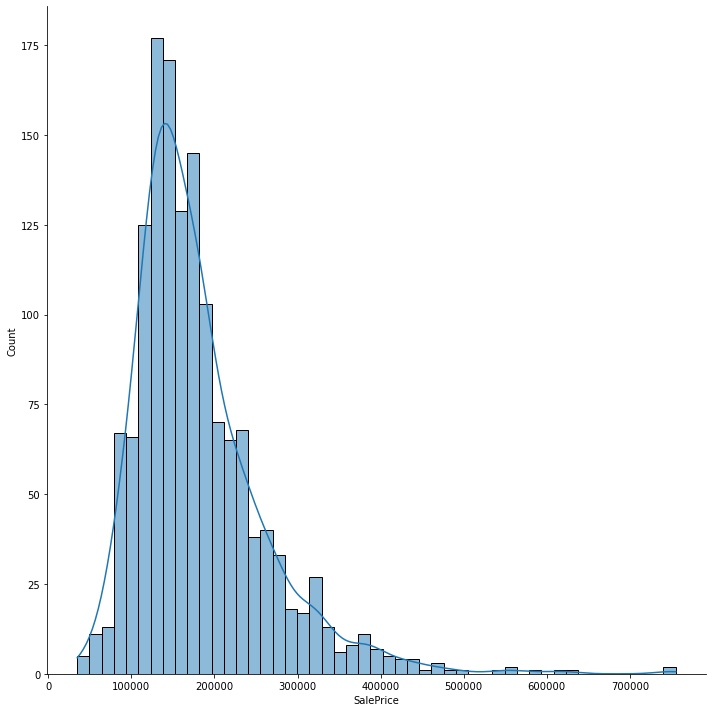

In [10]:
#Distribution of the target variable

sns.displot(df_train["SalePrice"], height=10, kde=True);

In [11]:
#Skewness and kurtosis

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Correlations

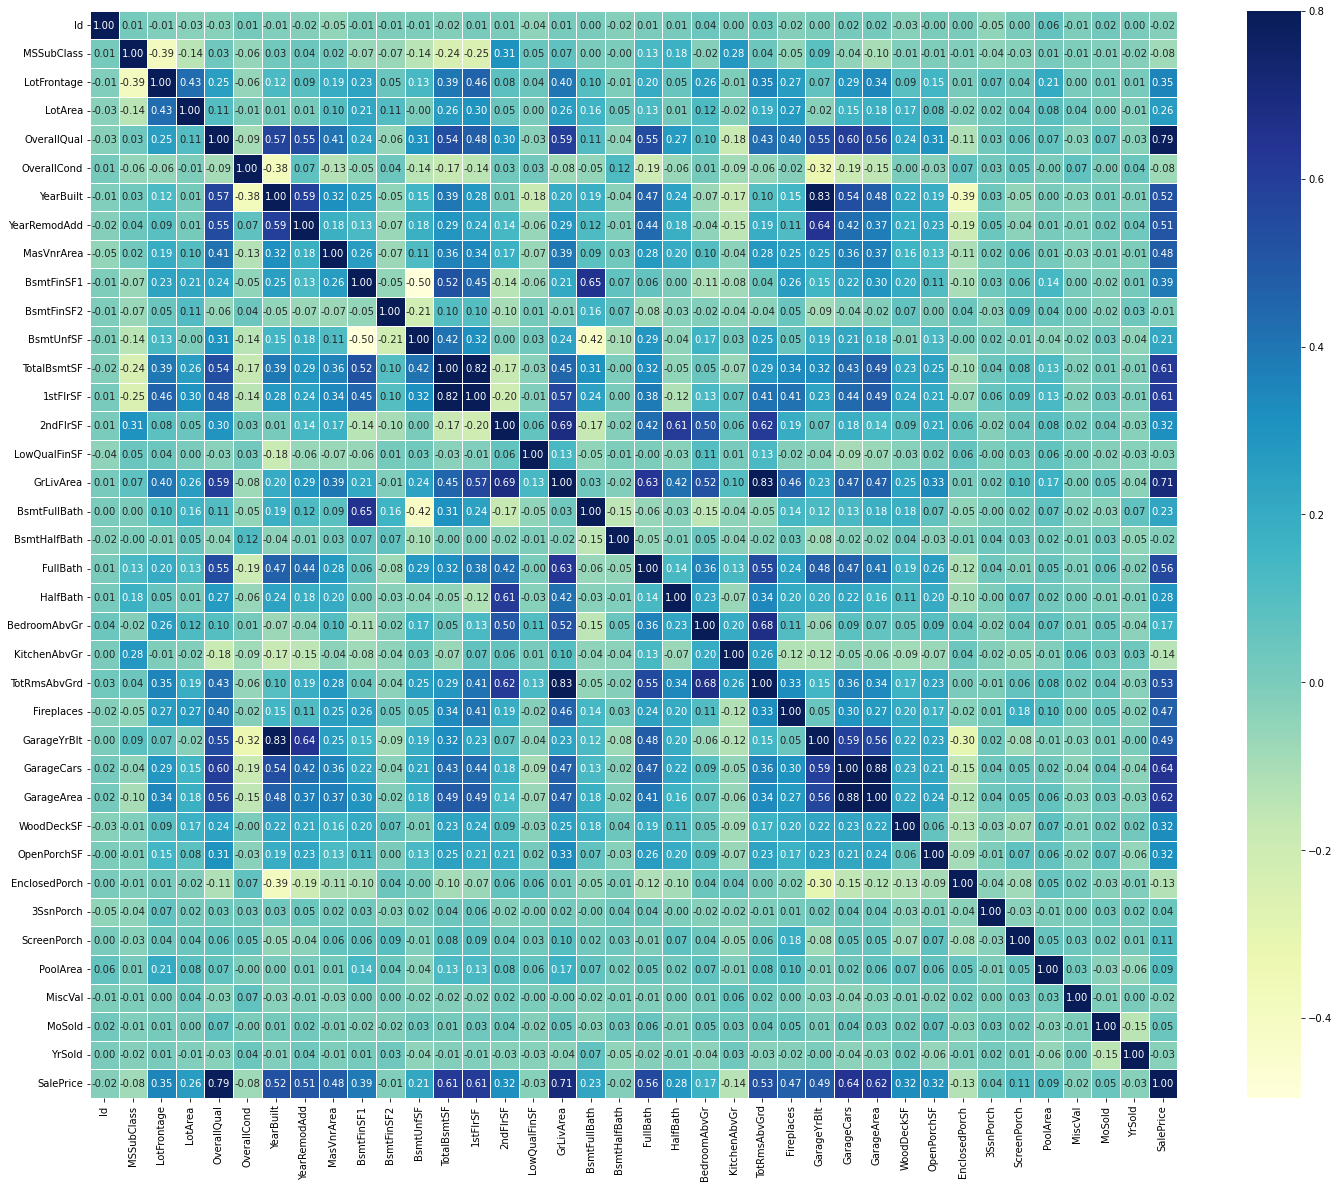

In [12]:
#Correlation matrix

matrix = df_train.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu", annot=True, fmt='.2f', linewidth=1);

In [13]:
#There are 10 variables which are the most correlated with SalePrice

max_corr_columns = matrix["SalePrice"].abs().nlargest(11)
max_corr_columns

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

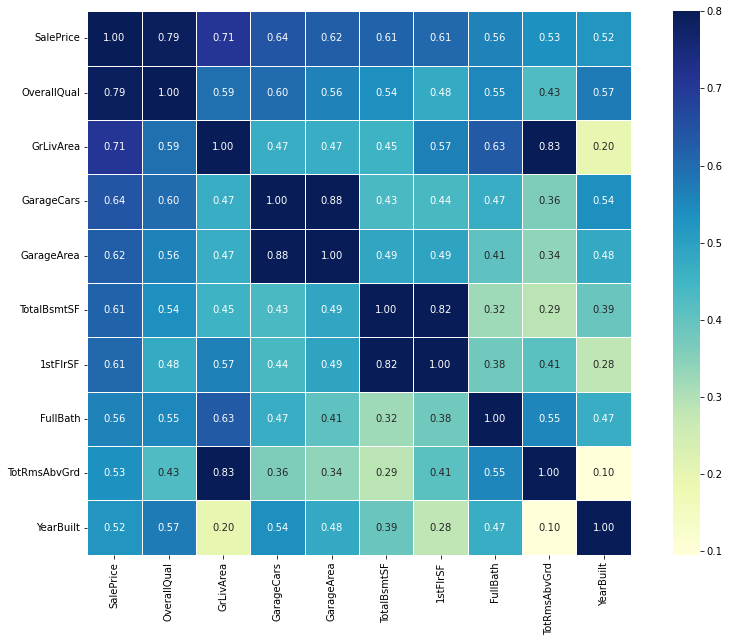

In [14]:
#Correlation matrix with the 10 most correlated variables

cols = matrix.nlargest(10, 'SalePrice')['SalePrice'].index
max_corr = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(max_corr, vmax=.8, square=True, cmap="YlGnBu", annot=True, fmt='.2f', linewidth=1, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Let's analyze revealed correlations.

> - SalePrice is strongly correlated with OverallQual, GrLivArea, and TotalBsmtSF.

> - The GarageArea variable depends on the car capacity (GarageCars). It makes sense to leave just one of those variables for further analysis. I will chose GarageCars because it is more correlated with the target variable.

> - The same situation is with the first-floor area (1stFlrSF) and total basement area (TotalBsmtSF). Here we will keep TotalBsmtSF.

> - TotRmsAbvGrd and GrLivArea are also strongly correlated. We will keep GrLivArea since it is strongly correlated with the target variable.

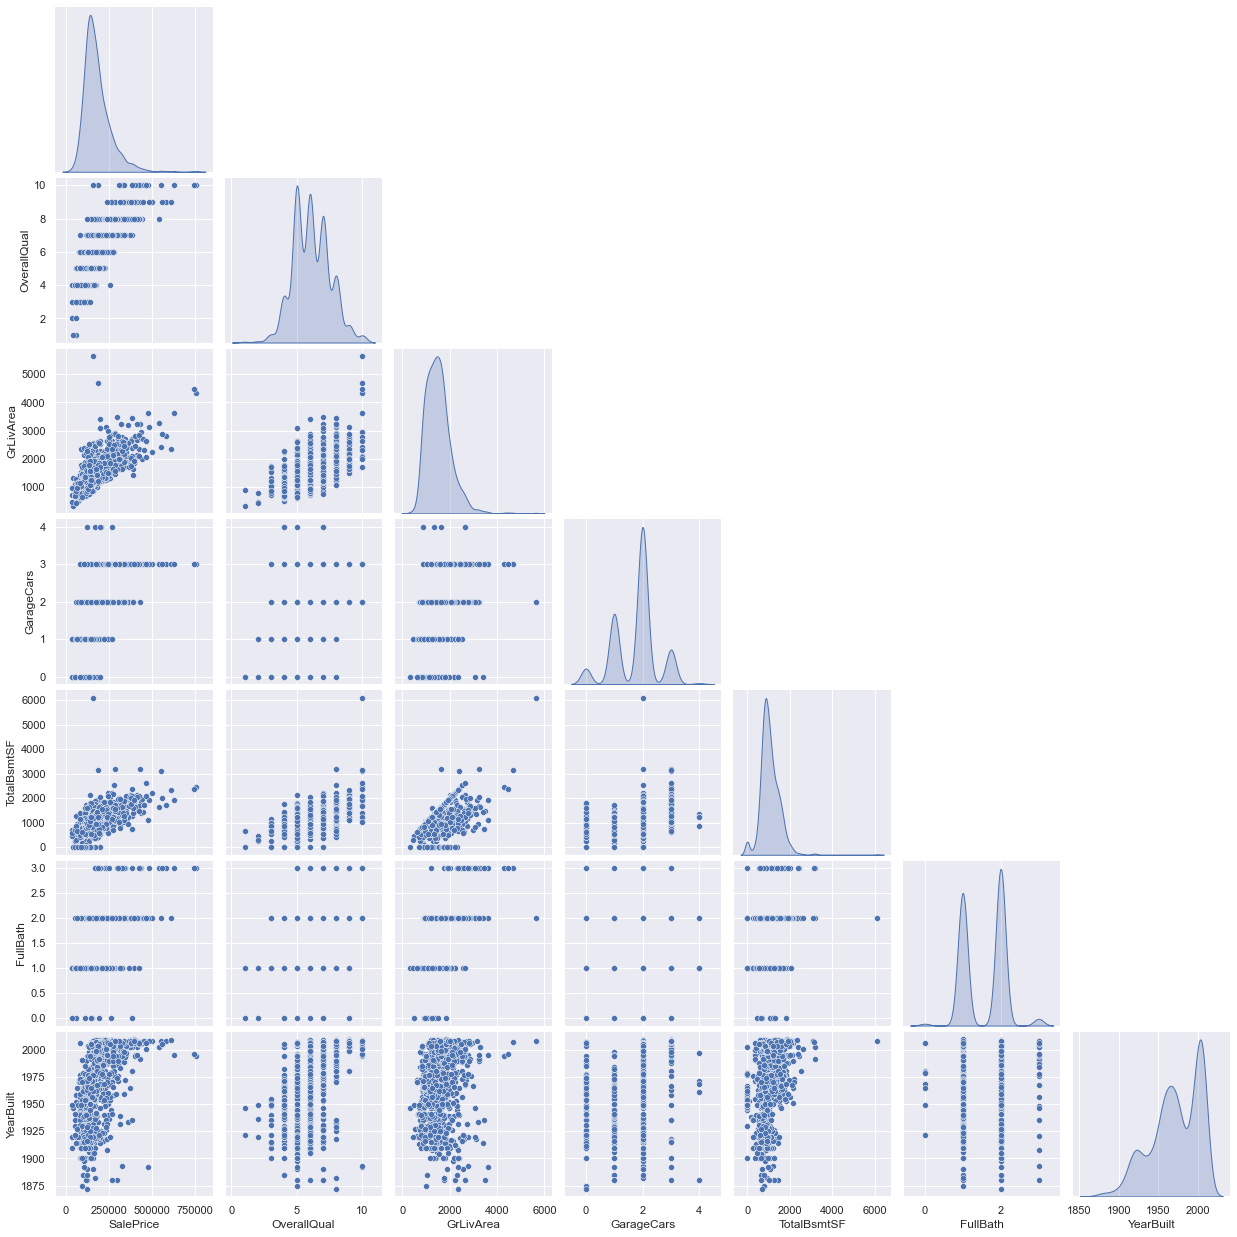

In [15]:
#Pairplots for the SalePrice

sns.set()
max_correlation_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[max_correlation_columns], size = 2.5, diag_kind='kde', corner=True, kind='scatter')
plt.show();

> - We can notice signs of linear relationships between SalePrice and GrLiveArea; SalePrice and TotalBsmtSF; SalePrice and YearBuilt.

> - It seems that TotalBsmtSF and GrLiveArea also have linear relationships since GrLiveArea can be the same size or bigger than TotalBsmtSF.

## Outliers

> Let's look at the outliers. When we explored SalePrice, we noticed quite a big difference between mean and max values. In the pair plot SalePrice/GrLiveArea we can see 4 dots with low SalePrice and high GrLivArea or with TotalBsmtSF around 6000 and low SalePrice. Let's examine those outliers once again.

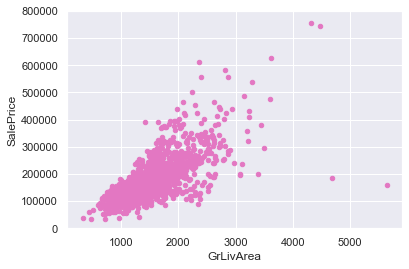

In [16]:
SP_GLiv = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
SP_GLiv.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), color = '#e377c2');

In [17]:
#All outliers seem to have GrLivArea > 4000

pd.set_option('display.max_columns', 100)
df_train.query('GrLivArea>4000')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
691            Gd          GLQ        1455          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
691         989         2444    GasA        Ex          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
691       2444      1872             0       4316             0             1   
1182      2411      2065             0       4476             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
691          3         1             4             1          Ex   
1182         3         1             4             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
691             10        Typ           2          Ex     Attchd       1994.0   
1182            10        Typ           2          TA     Attchd       1996.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
691           Fin           3         832         TA         TA          Y   
1182          Fin           3

In [18]:
#We will delete columns with identical values to see peculiarities of the outliers

GrLivArea_df = df_train[df_train['GrLivArea']>4000]
non_unique_cols = GrLivArea_df.nunique()
cols_to_drop = non_unique_cols[non_unique_cols == 1].index
GrLivArea_df_drop = GrLivArea_df.drop(cols_to_drop, axis=1)
GrLivArea_df_drop

Id  LotFrontage  LotArea Alley LotShape LandContour LotConfig  \
523    524        130.0    40094   NaN      IR1         Bnk    Inside   
691    692        104.0    21535   NaN      IR1         Lvl    Corner   
1182  1183        160.0    15623   NaN      IR1         Lvl    Corner   
1298  1299        313.0    63887   NaN      IR3         Bnk    Corner   

     Neighborhood Condition1 Condition2  OverallCond  YearBuilt  YearRemodAdd  \
523       Edwards       PosN       PosN            5       2007          2008   
691       NoRidge       Norm       Norm            6       1994          1995   
1182      NoRidge       Norm       Norm            5       1996          1996   
1298      Edwards      Feedr       Norm            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
523        Hip  CompShg     CemntBd     CmentBd      Stone       762.0   
691      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
1182       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   
1298       Hip  ClyTile      Stucco      Stucco      Stone       796.0   

     ExterQual BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
523         Ex           Gd        2260        878         3138      3138   
691         Ex           Gd        1455        989         2444      2444   
1182        Gd           Av        2096        300         2396      2411   
1298        Ex           Gd        5644        466         6110      4692   

      2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  BedroomAbvGr  \
523       1538       4676             1             0         3             3   
691       1872       4316             0             1         3             4   
1182      2065       4476             1             0         3             4   
1298       950       5642             2             0         2             3   

      TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11           1          Gd    BuiltIn       2007.0   
691             10           2          Ex     Attchd       1994.0   
1182            10           2          TA     Attchd       1996.0   
1298            12           3          Gd     Attchd       2008.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  PoolArea PoolQC  \
523            3         884         208          406         0    NaN   
691            3         832         382           50         0    NaN   
1182           3         813         171           78       555     Ex   
1298           2        1418         214          292       480     Gd   

     MiscFeature  MoSold  YrSold SaleType SaleCondition  SalePrice  
523          NaN      10    2007      New       Partial     184750  
691          NaN       1    2007       WD        Normal     755000  
1182         NaN       7    2007       WD       Abnorml     745000  
1298         NaN       1    2008      New       Partial     160000

> For example, we noticed that houses with the high SalePrice are newer (YearBuilt >1996), and have bigger basements (TotalBsmtSF) and first-floor areas (1stFlrSF). Also, they are located in different neighborhoods(Edwards v.s. Noridge).

In [19]:
GrLivArea_df_drop[["YearBuilt", "TotalBsmtSF", "1stFlrSF", "Neighborhood", "SalePrice"]]

YearBuilt  TotalBsmtSF  1stFlrSF Neighborhood  SalePrice
523        2007         3138      3138      Edwards     184750
691        1994         2444      2444      NoRidge     755000
1182       1996         2396      2411      NoRidge     745000
1298       2008         6110      4692      Edwards     160000

In [20]:
px.scatter(data_frame=df_train, x="GrLivArea", y="SalePrice", hover_data=['Id'], color = 'Neighborhood')

> Although two houses in Norridge have incredibly high prices, they follow the general trend. Unlike two houses with the large GrLivArea from Edwards.

## Missing values

In [21]:
#Let's see which columns contain the missing values

count_na = df_train.isna().sum()
count_na[count_na>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

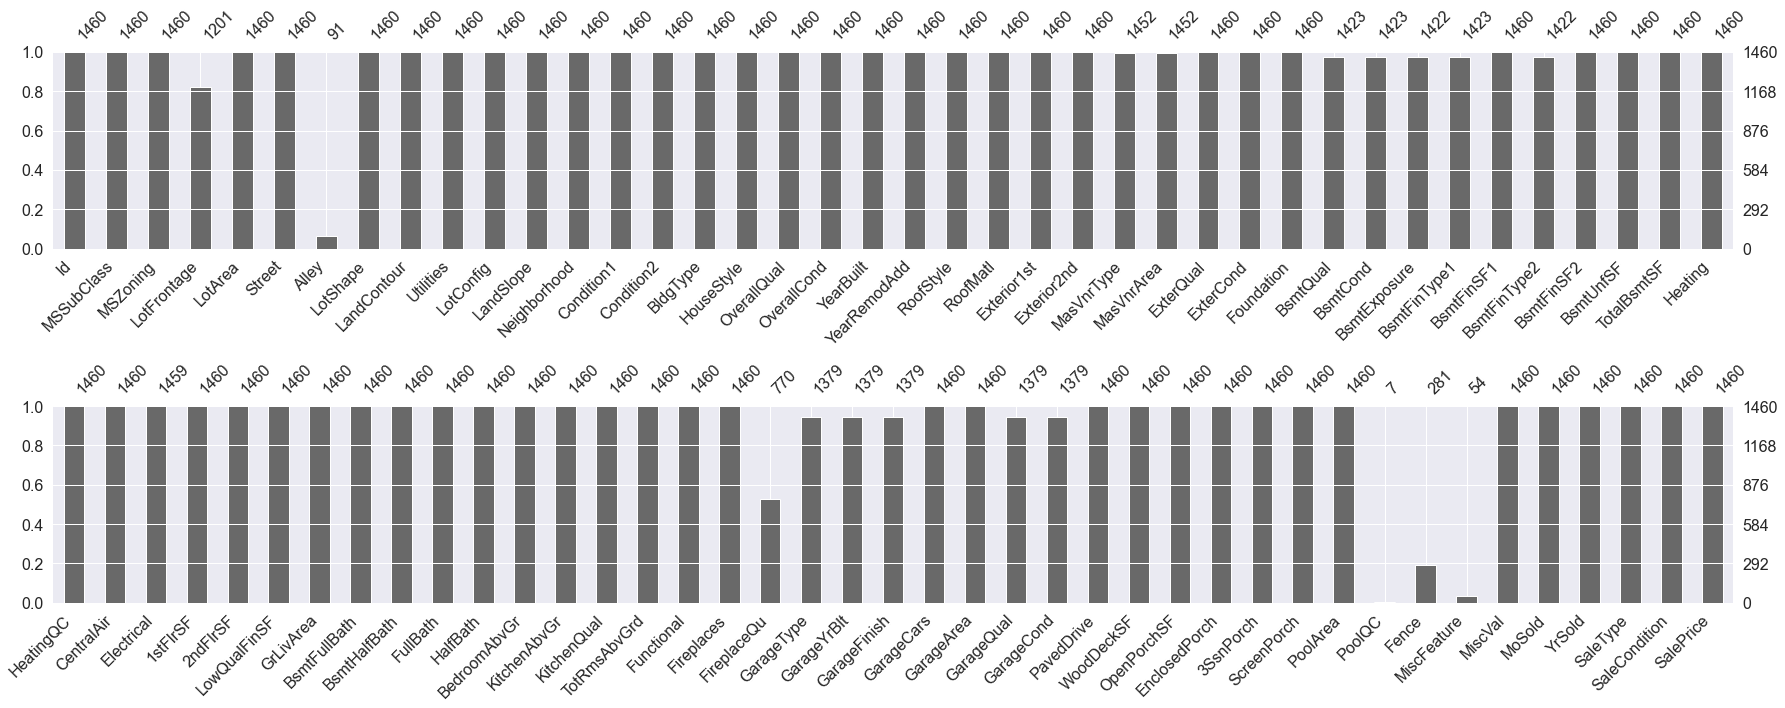

In [22]:
plt.subplot(2,1,1)
msno.bar(df_train[df_train.columns[:40]])
plt.subplot(2,1,2)
msno.bar(df_train[df_train.columns[40:]])
plt.tight_layout()

In [23]:
#Let's check percent of missing values in every column

def missing_data_table(dataframe):
    dtype = dataframe.dtypes
    n_missing = dataframe.isnull().sum().sort_values(ascending=False)
    percentage_missing = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)    
    percentage_missing = percentage_missing *100
    missing_data = pd.concat([dtype, n_missing, percentage_missing], axis=1, keys=['dtype','n_missing', 'percentage_missing'])
    return missing_data

missing_values = missing_data_table(df_train)
missing_values_oredered = missing_values[missing_values.n_missing > 0].sort_values(by = 'percentage_missing', ascending=False)
missing_values_oredered

dtype  n_missing  percentage_missing
PoolQC         object       1453           99.520548
MiscFeature    object       1406           96.301370
Alley          object       1369           93.767123
Fence          object       1179           80.753425
FireplaceQu    object        690           47.260274
LotFrontage   float64        259           17.739726
GarageType     object         81            5.547945
GarageYrBlt   float64         81            5.547945
GarageFinish   object         81            5.547945
GarageQual     object         81            5.547945
GarageCond     object         81            5.547945
BsmtExposure   object         38            2.602740
BsmtFinType2   object         38            2.602740
BsmtFinType1   object         37            2.534247
BsmtCond       object         37            2.534247
BsmtQual       object         37            2.534247
MasVnrArea    float64          8            0.547945
MasVnrType     object          8            0.547945
Electrical     object          1            0.068493

# Preparing data for modeling



## Filling missing values

In [24]:
#I am going to delete columns PoolQC, MiscFeature, Alley, Fence, FireplaceQu 
#They have more than 20% of the missing values

combine = [df_train, df_test]
for dataset in combine:
    dataset.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1,inplace=True)
    
df_train.shape, df_test.shape

((1460, 76), (1459, 75))

In [25]:
#Splitting  df_train on X and y

y = df_train['SalePrice']
X = df_train.drop(columns = 'SalePrice', axis = 1)
X.shape, y.shape, df_test.shape

((1460, 75), (1460,), (1459, 75))

In [26]:
#Selecting categorical columns

categorical = X.select_dtypes(['object'])
cat_cols = list(categorical.columns.values)
len(cat_cols)

38

In [27]:
#Selecting numerical columns

numerical = X.select_dtypes(['int', 'float'])
num_cols = list(numerical.columns.values)
len(num_cols)

37

In [28]:
#Filling missing values in numerical columns of the train dataset with the help of the Mice method

X_mice = mice(X[num_cols].values)
imputed_X_num = pd.DataFrame(X_mice, columns=num_cols)
X[num_cols] = imputed_X_num

In [29]:
#Filling missing values in numerical columns of the test dataset with the help of the Mice method

df_test_mise = mice(df_test[num_cols].values)
imputed_test_num = pd.DataFrame(df_test_mise, columns=num_cols)
df_test[num_cols] = imputed_test_num

In [30]:
#Filling missing values in categorical columns of the train dataset with the help of the SimpleImputer

X[cat_cols] = X[cat_cols].fillna('None')

mf_imputer = SimpleImputer(strategy = "most_frequent")

result_mean_imputer = mf_imputer.fit_transform(X[cat_cols])

X[cat_cols] = pd.DataFrame(result_mean_imputer, columns = cat_cols)

In [31]:
#Filling missing values in categorical columns of the test dataset with the help of the SimpleImputer

df_test[cat_cols] = df_test[cat_cols].fillna('None')

mf_imputer = SimpleImputer(strategy = "most_frequent")

result_mean_imputer = mf_imputer.fit_transform(df_test[cat_cols])

df_test[cat_cols] = pd.DataFrame(result_mean_imputer, columns = cat_cols)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   float64
 17  OverallCond    1459 non-null   float64
 18  YearBuil

## Log transformation of the target variable SalePrice


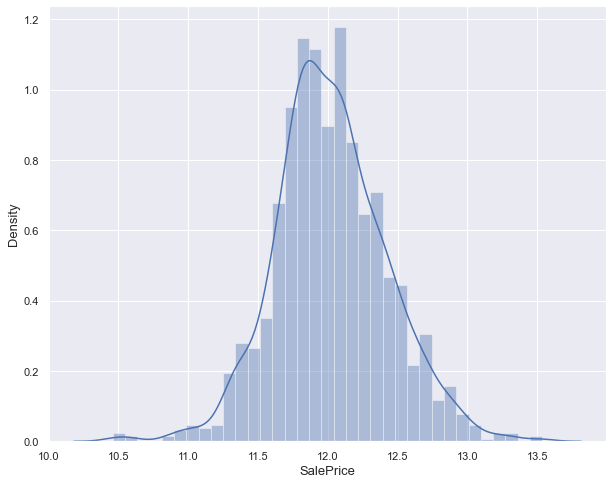

In [34]:
y = np.log1p(y)
plt.figure(figsize=(10,8))
sns.distplot(y)
plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)
plt.show()

## Deleting the least correlated variables

In [35]:
matrix['SalePrice'].sort_values(axis=0, ascending=True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [36]:
matrix_2 = pd.DataFrame(matrix.iloc[-1,:]).T

delete_col = []
for col in matrix_2:
    if abs(0 < matrix_2[col][0]) <= 0.2:
        delete_col.append(col)
print(delete_col)

['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold']


In [37]:
combine = [X, df_test]
for dataset in combine:
    dataset.drop(['Id', 'MSSubClass', 'OverallCond', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
                  'EnclosedPorch', 'MiscVal', 'YrSold'], axis = 1, inplace = True)
    
X.shape, df_test.shape

((1460, 66), (1459, 66))

## One Hot encoding

In [38]:
one_hot_train = pd.get_dummies(X)
one_hot_train.shape

(1460, 272)

# Modeling

In [39]:
one_hot_train.shape, y.shape

((1460, 272), (1460,))

In [40]:
#Train-test split

x_train = one_hot_train
y_train = y

x_test = df_test

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1022, 272) (438, 272) (1022,) (438,)


In [41]:
def plot_predictions(name, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name, pred, actual):
    mse = mean_squared_error(pred, actual)
    print(f'MSE for {name} is {mse}')

## ElasticNet Regression

In [42]:
name = "ElasticNet"

model = ElasticNet(alpha=0.01, l1_ratio=0.8)

model.fit(x_train, y_train)

elasticnet_pred = model.predict(x_test)

MSE for ElasticNet is 0.039082271458232405


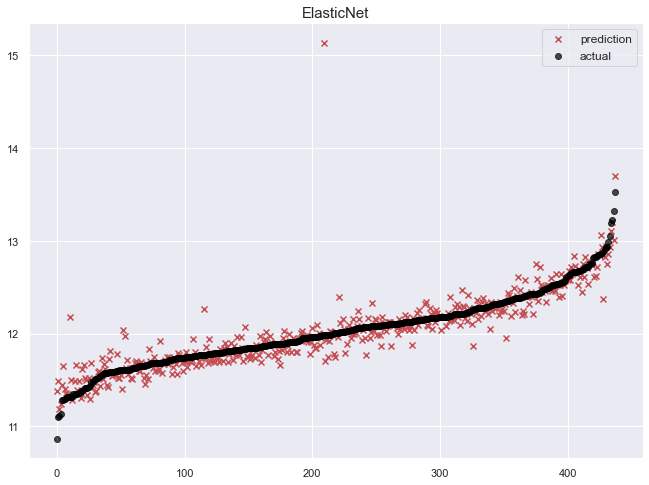

In [43]:
mse_eval(name, elasticnet_pred, y_test)
plot_predictions(name, elasticnet_pred, y_test)

In [44]:
#Hyperparameter tuning

tuned_parameters = {"alpha": np.array([1,0.1,0.01,0.001,0.0001,0]), "l1_ratio": np.arange(0, 1, 0.1)}

elastic_cv = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv=10, n_jobs=1)

elastic_cv.fit(x_train, y_train)

print(f"Best hyperparameters: {elastic_cv.best_params_}")

Best hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.30000000000000004}


MSE for ElasticNet is 0.029898401952038533


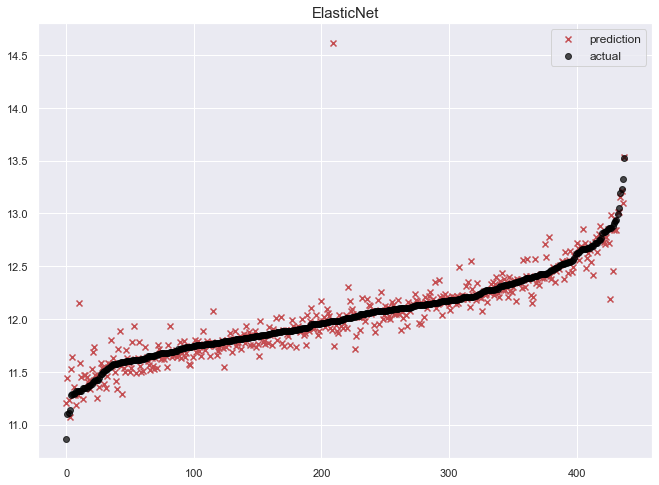

In [45]:
#Using ElasticNet with the best hyperparameters

name = "ElasticNet"

elastic_mod = ElasticNet(**elastic_cv.best_params_)

elastic_mod.fit(x_train, y_train)

y_pred = elastic_mod.predict(x_test)

mse_eval(name, y_pred, y_test)
plot_predictions(name, y_pred, y_test)

## XGBoost

MSE for XGBoost is 0.018991291438891965


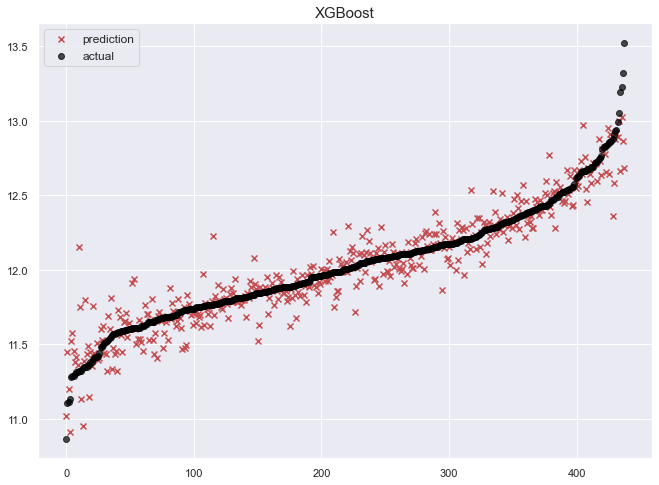

In [46]:
name = "XGBoost"

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

mse_eval(name, xgb_pred, y_test)
plot_predictions(name, xgb_pred, y_test)

In [47]:
#Hyperparameter tuning

tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

xgbr_cv = GridSearchCV(estimator = xgb,
                       param_grid = tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

xgbr_cv.fit(x_train, y_train)

print(f"Best hyperparameters: {xgbr_cv.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


MSE for XGBoost is 0.014606356500669418


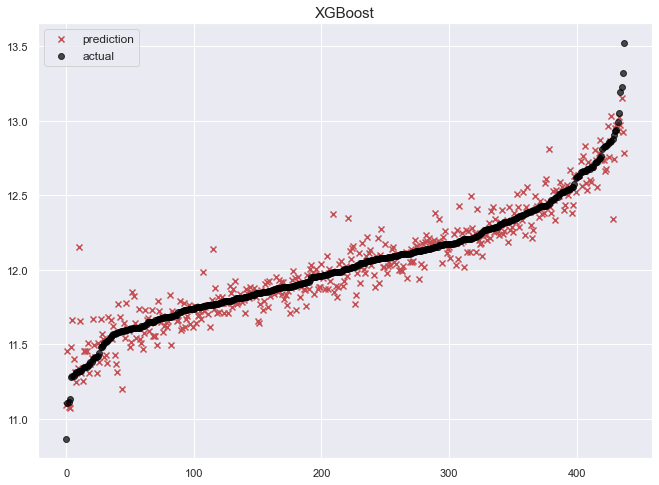

In [48]:
#Using ElasticNet with the best hyperparameters

name = "XGBoost"

xgbr_mod = XGBRegressor(**xgbr_cv.best_params_)

xgbr_mod.fit(x_train, y_train)

y_pred = xgbr_mod.predict(x_test)

mse_eval(name, y_pred, y_test)
plot_predictions(name, y_pred, y_test)

> To conclude, XGBoost shows smaller MSE than ElasticNet regression.